<div class="burk">
PART- 3 ( Handling With Outliers )</div><i class="fa fa-lightbulb-o "></i>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df0=pd.read_csv('auto_scout_filled.csv')

In [3]:
df=df0.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14244 entries, 0 to 14243
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           14244 non-null  object 
 1   body_type            14244 non-null  object 
 2   price                14244 non-null  int64  
 3   km                   14244 non-null  int64  
 4   Type                 14244 non-null  object 
 5   Previous_Owners      14244 non-null  float64
 6   Nr_of_Doors          14244 non-null  float64
 7   Nr_of_Seats          14244 non-null  float64
 8   Gearing_Type         14244 non-null  object 
 9   Drive_Chain          14244 non-null  object 
 10  Fuel                 14244 non-null  object 
 11  comfort_convenience  14244 non-null  object 
 12  entertainment_media  14244 non-null  object 
 13  Extras               14244 non-null  object 
 14  safety_security      14244 non-null  object 
 15  Gears                14244 non-null 

In [5]:
df.head().T

,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
km,56013,80000,83450,73000,16200
Type,Used,Used,Used,Used,Used
Previous_Owners,2.000,1.000,1.000,1.000,1.000
Nr_of_Doors,5.000,3.000,4.000,3.000,5.000
Nr_of_Seats,5.000,4.000,4.000,4.000,5.000
Gearing_Type,Automatic,Automatic,Automatic,Automatic,Automatic
Drive_Chain,front,front,front,front,front


In [6]:
df.shape

(14244, 25)

In [7]:
df.duplicated().sum()

96

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(14148, 25)

In [10]:
# We defined a function that shows the first info of the column

def info(col):
    print("Column Name    : ", col)
    print("--------------------------------")
    print("Number of Nulls       : ", df[col].isnull().sum())
    print("Percentage of Nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("Number of Uniques     : ", df[col].nunique())
    print("\n--------------------------------")
    print(df[col].value_counts(dropna = False))

In [11]:
def fillallmethod(df, group_col1, group_col2, col_name, method): # method can be "mode" or "mean" or "ffill"
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])
                
    elif method == "mean":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mean()).fillna(df[cond1][col_name].mean()).fillna(df[col_name].mean())


    elif method == "median":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].median()).fillna(df[cond1][col_name].median()).fillna(df[col_name].mean())

    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [12]:
df.columns

Index(['make_model', 'body_type', 'price', 'km', 'Type', 'Previous_Owners',
       'Nr_of_Doors', 'Nr_of_Seats', 'Gearing_Type', 'Drive_Chain', 'Fuel',
       'comfort_convenience', 'entertainment_media', 'Extras',
       'safety_security', 'Gears', 'age', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Displacement_cc', 'Weight_kg',
       'cons_comb', 'CO2_Emission'],
      dtype='object')

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,14148.000,18104.194,7426.558,13.000,12950.000,16950.000,21900.000,74600.000
km,14148.000,32416.062,36958.256,0.000,3650.000,21000.000,46900.000,317000.000
Previous_Owners,14148.000,1.042,0.337,0.000,1.000,1.000,1.000,4.000
Nr_of_Doors,14148.000,4.659,0.643,1.000,4.000,5.000,5.000,7.000
Nr_of_Seats,14148.000,4.949,0.466,2.000,5.000,5.000,5.000,7.000
Gears,14148.000,5.825,0.790,1.000,5.000,6.000,6.000,50.000
age,14148.000,1.415,1.109,0.000,0.000,1.000,2.000,3.000
hp_kW,14148.000,88.059,27.468,0.000,66.000,85.000,101.000,294.000
Displacement_cc,14148.000,1429.925,336.218,1.000,1229.000,1461.000,1598.000,16000.000
Weight_kg,14148.000,1343.335,201.268,1.000,1165.000,1319.500,1487.000,2471.000


In [14]:
df.describe(include='O').T

,count,unique,top,freq
make_model,14148,9,Audi A3,2739
body_type,14148,8,Sedans,7183
Type,14148,5,Used,10110
Gearing_Type,14148,3,Manual,7176
Drive_Chain,14148,3,front,13977
Fuel,14148,4,Benzine,7517
comfort_convenience,14148,6198,"Air conditioning,Electrical side mirrors,Hill ...",307
entertainment_media,14148,346,"Bluetooth,Hands-free equipment,On-board comput...",1542
Extras,14148,659,Alloy wheels,4953
safety_security,14148,4443,"ABS,Central door lock,Daytime running lights,D...",628


In [15]:
df.select_dtypes(exclude='object').columns

Index(['price', 'km', 'Previous_Owners', 'Nr_of_Doors', 'Nr_of_Seats', 'Gears',
       'age', 'hp_kW', 'Displacement_cc', 'Weight_kg', 'cons_comb',
       'CO2_Emission'],
      dtype='object')

In [16]:
df.select_dtypes(include='object').columns

Index(['make_model', 'body_type', 'Type', 'Gearing_Type', 'Drive_Chain',
       'Fuel', 'comfort_convenience', 'entertainment_media', 'Extras',
       'safety_security', 'Inspection_new', 'Paint_Type', 'Upholstery_type'],
      dtype='object')

We divided the columns into 2 parts. We will first examine the numeric columns and then the categorical columns.

# price

In [17]:
info('price')

Column Name    :  price
--------------------------------
Number of Nulls       :  0
Percentage of Nulls   :  % 0.0
Number of Uniques     :  2956

--------------------------------
14990    121
15990    120
15900    105
17990    100
13990     91
        ... 
21005      1
21334      1
21360      1
21745      1
39875      1
Name: price, Length: 2956, dtype: int64


In [18]:
df.price.describe()

count   14148.000
mean    18104.194
std      7426.558
min        13.000
25%     12950.000
50%     16950.000
75%     21900.000
max     74600.000
Name: price, dtype: float64

In [19]:
df.price.sort_values().head(5)

7786      13
8015     120
5460     255
8016     331
8014    4950
Name: price, dtype: int64

In [20]:
df.drop(index = [7786, 8015, 5460,8016], axis = 0, inplace = True)

In [21]:
df.reset_index(drop = True, inplace = True)

In [22]:
df.shape

(14144, 25)

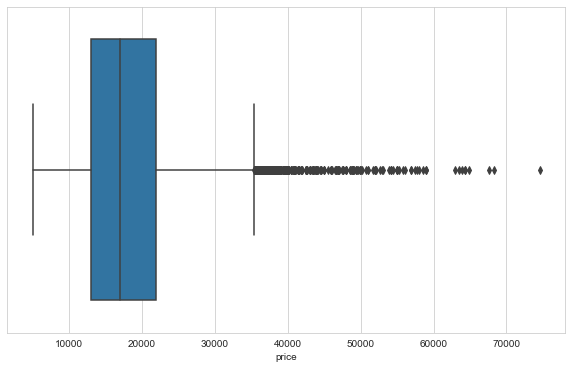

In [23]:
sns.boxplot(data=df, x='price');

In [24]:
df.price.sort_values().tail(5)

14061    64332
3233     64900
3294     67600
14060    68320
3293     74600
Name: price, dtype: int64

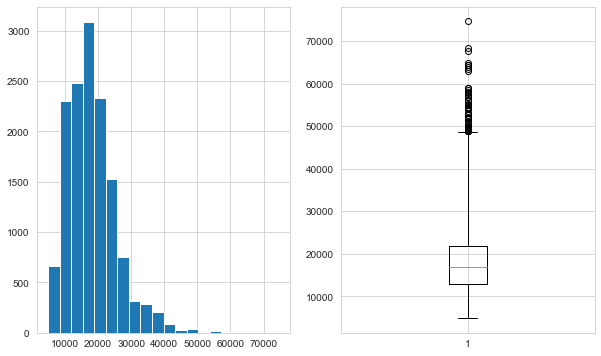

In [25]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(df.price, bins=20)

plt.subplot(122)
plt.boxplot(df.price, whis=3)

plt.show()

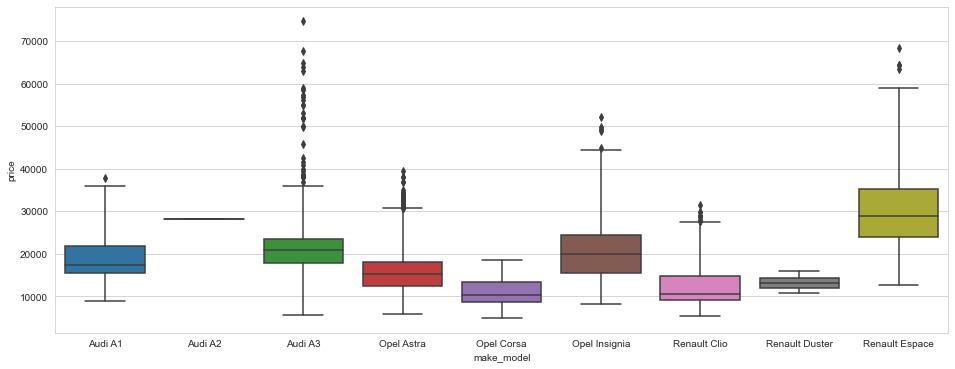

In [26]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make_model", y="price", data=df, whis=2.3)
plt.show()

We have determined that the price range is very wide especially in the A3 vehicle. Therefore, according to the boxplot we created, a large number of outliers were formed. According to our research and domain knowledge, most of these values are possible values. Therefore, although we deleted the very small values, which was impossible, we did not delete the high values.

# km

In [27]:
info('km')

Column Name    :  km
--------------------------------
Number of Nulls       :  0
Percentage of Nulls   :  % 0.0
Number of Uniques     :  6688

--------------------------------
0       875
10      739
1       284
5       126
50      116
       ... 
3339      1
1988      1
90        1
506       1
57        1
Name: km, Length: 6688, dtype: int64


In [28]:
df.km.sort_values().tail()

13557    240000
5583     248000
5108     260000
2704     291800
8364     317000
Name: km, dtype: int64

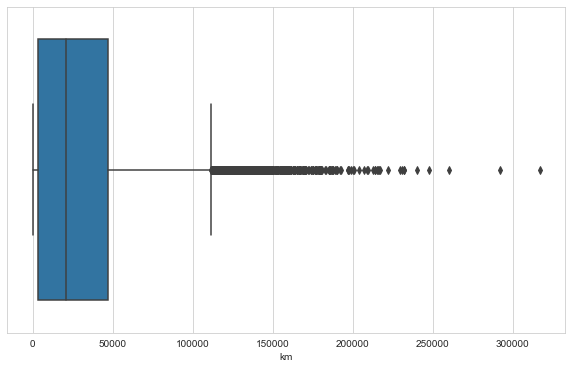

In [29]:
sns.boxplot(data=df, x='km');

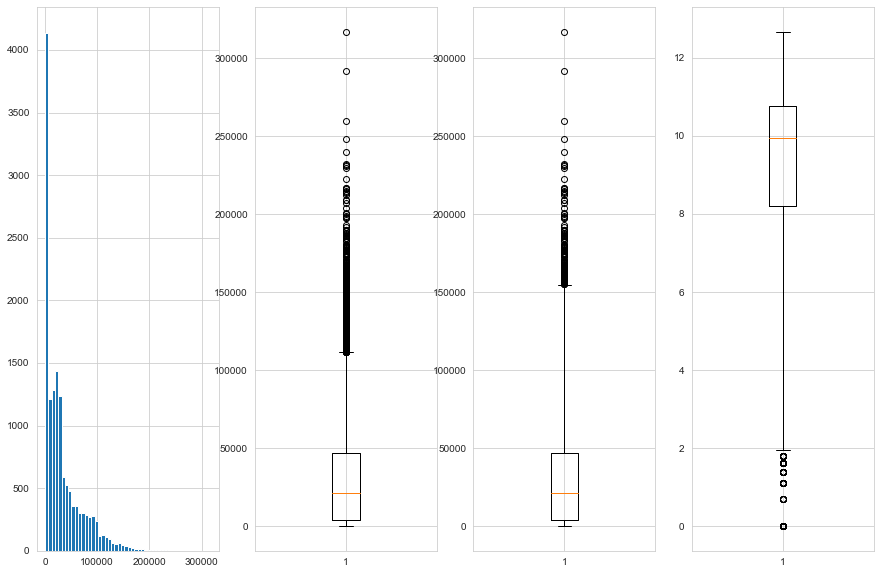

In [30]:
plt.figure(figsize=(15,10))
plt.subplot(141)
plt.hist(df.km, bins = 50)

plt.subplot(142)
plt.boxplot(df.km)

plt.subplot(143)
plt.boxplot(df.km, whis = 2.5)

plt.subplot(144)
plt.boxplot(np.log(df.km), whis = 2.5)
plt.show()

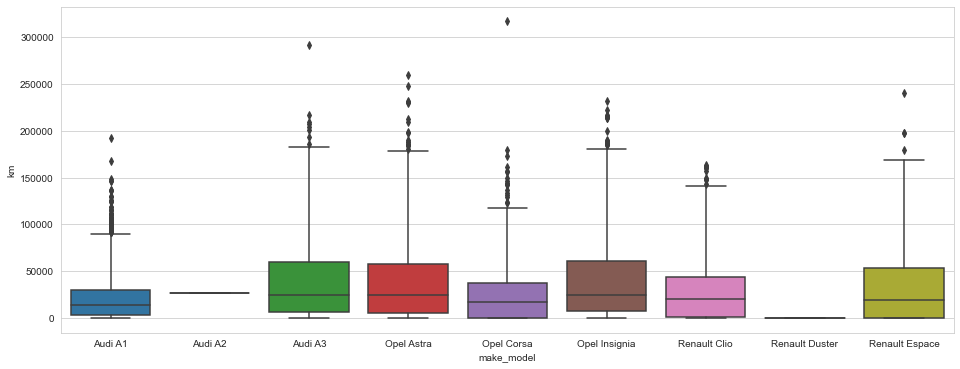

In [31]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make_model", y="km", data=df, whis=2.3)
plt.show()

# Previous_Owners

In [32]:
info('Previous_Owners')

Column Name    :  Previous_Owners
--------------------------------
Number of Nulls       :  0
Percentage of Nulls   :  % 0.0
Number of Uniques     :  5

--------------------------------
1.000    12621
2.000     1008
0.000      483
3.000       30
4.000        2
Name: Previous_Owners, dtype: int64


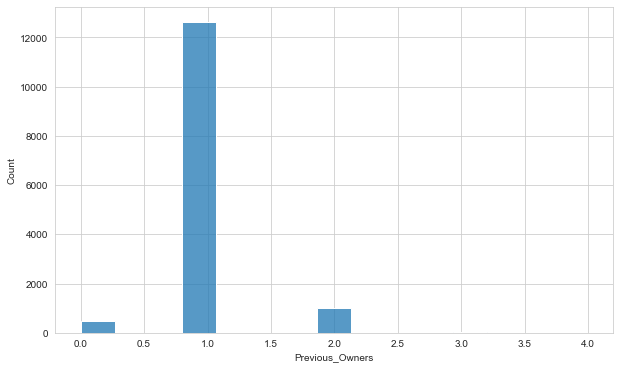

In [33]:
sns.histplot(data=df, x='Previous_Owners');

# Nr_of_Doors

In [34]:
df.Nr_of_Doors.value_counts()

5.000    10446
4.000     2759
3.000      743
2.000      194
1.000        1
7.000        1
Name: Nr_of_Doors, dtype: int64

In [35]:
df.Nr_of_Doors.replace([1, 7], np.nan, inplace=True)

In [36]:
df.Nr_of_Doors.value_counts(dropna = False)

5.000    10446
4.000     2759
3.000      743
2.000      194
NaN          2
Name: Nr_of_Doors, dtype: int64

In [37]:
fillallmethod(df, "make_model", "body_type", "Nr_of_Doors", "mode")

Number of NaN :  0
------------------
5.000    10448
4.000     2759
3.000      743
2.000      194
Name: Nr_of_Doors, dtype: int64


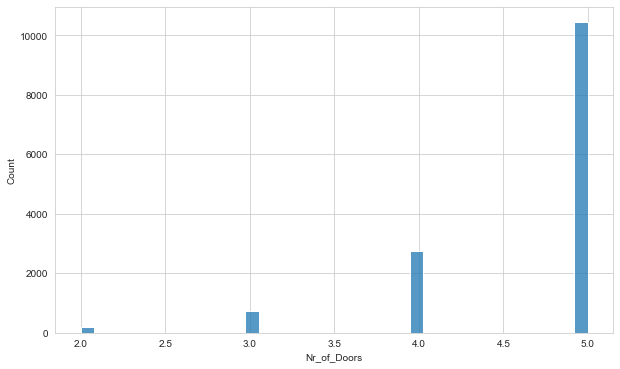

In [38]:
sns.histplot(data=df, x='Nr_of_Doors');

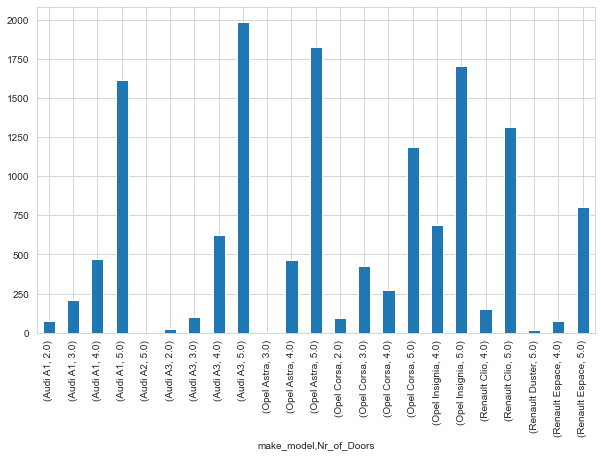

In [39]:
df.groupby(["make_model", "Nr_of_Doors"]).Nr_of_Doors.count().plot.bar();

In [40]:
df.drop("Nr_of_Doors", axis=1, inplace=True)

# Nr_of_Seats

In [41]:
df.Nr_of_Seats.value_counts()

5.000    12673
4.000     1070
7.000      309
2.000       89
6.000        2
3.000        1
Name: Nr_of_Seats, dtype: int64

In [42]:
df.Nr_of_Seats.replace([3, 6], np.nan, inplace=True)

In [43]:
df.Nr_of_Seats.value_counts(dropna = False)

5.000    12673
4.000     1070
7.000      309
2.000       89
NaN          3
Name: Nr_of_Seats, dtype: int64

In [44]:
fillallmethod(df, "make_model", "body_type", "Nr_of_Seats", "mode")

Number of NaN :  0
------------------
5.000    12676
4.000     1070
7.000      309
2.000       89
Name: Nr_of_Seats, dtype: int64


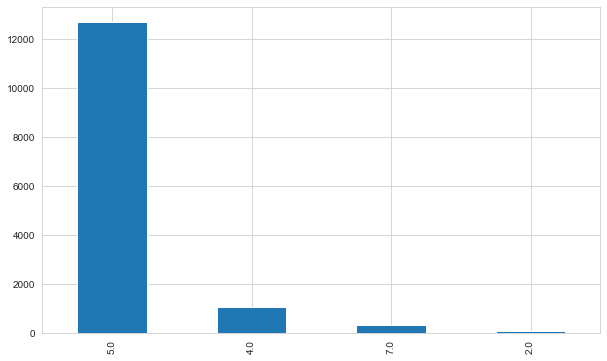

In [45]:
df.Nr_of_Seats.value_counts(dropna = False).plot.bar();

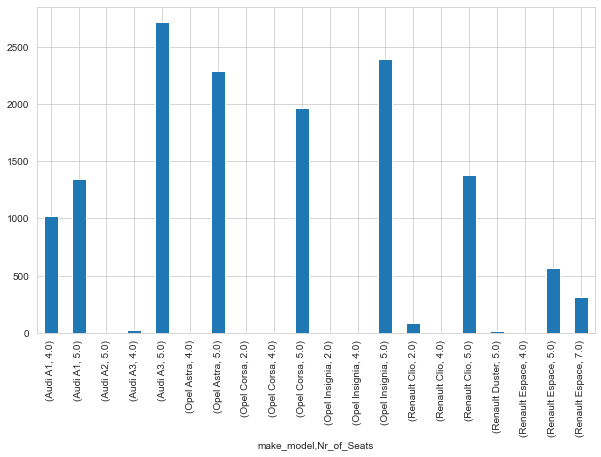

In [46]:
df.groupby(["make_model", "Nr_of_Seats"]).Nr_of_Seats.count().plot.bar();

In [47]:
df.drop("Nr_of_Seats", axis=1, inplace=True)

# Gears

In [48]:
info('Gears')

Column Name    :  Gears
--------------------------------
Number of Nulls       :  0
Percentage of Nulls   :  % 0.0
Number of Uniques     :  10

--------------------------------
6.000     7525
5.000     4658
7.000     1753
8.000      197
9.000        4
1.000        2
3.000        2
2.000        1
50.000       1
4.000        1
Name: Gears, dtype: int64


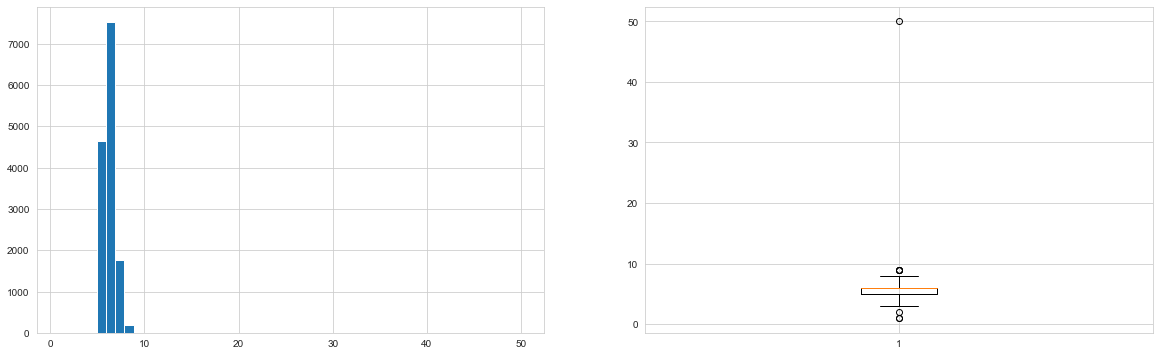

In [49]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Gears, bins=50)

plt.subplot(122)
plt.boxplot(df.Gears, whis=2.5)

plt.show()

In [50]:
df.Gears.describe()

count   14144.000
mean        5.825
std         0.790
min         1.000
25%         5.000
50%         6.000
75%         6.000
max        50.000
Name: Gears, dtype: float64

In [51]:

df.Gears.sort_values().tail(10)

10794    8.000
11305    8.000
11306    8.000
11307    8.000
11308    8.000
14058    9.000
14102    9.000
14048    9.000
14109    9.000
12961   50.000
Name: Gears, dtype: float64

In [52]:
df.Gears.sort_values().head(10)

12875   1.000
8062    1.000
8861    2.000
14052   3.000
14078   3.000
14057   4.000
8192    5.000
6086    5.000
6082    5.000
6079    5.000
Name: Gears, dtype: float64

In [53]:
# Checking the extreme values by Gear.  
df[(df.Gears < 5) | (df.Gears > 8)][["make_model", "body_type", "Gearing_Type", "Gears"]]

,make_model,body_type,Gearing_Type,Gears
8062,Opel Corsa,Compact,Semi-automatic,1.000
8861,Opel Corsa,Sedans,Manual,2.000
12875,Renault Clio,Compact,Automatic,1.000
12961,Renault Clio,Sedans,Manual,50.000
14048,Renault Espace,Van,Automatic,9.000
14052,Renault Espace,Van,Automatic,3.000
14057,Renault Espace,Van,Automatic,4.000
14058,Renault Espace,Van,Automatic,9.000
14078,Renault Espace,Van,Automatic,3.000
14102,Renault Espace,Van,Automatic,9.000


In [54]:
df[(df.make_model == "Renault Espace")][["make_model", "body_type", "Gearing_Type", "Gears"]]

,make_model,body_type,Gearing_Type,Gears
13266,Renault Espace,Van,Automatic,6.000
13267,Renault Espace,Station wagon,Automatic,6.000
13268,Renault Espace,Transporter,Automatic,6.000
13269,Renault Espace,Van,Automatic,6.000
13270,Renault Espace,Van,Automatic,6.000
...,...,...,...,...
14139,Renault Espace,Van,Automatic,6.000
14140,Renault Espace,Van,Automatic,6.000
14141,Renault Espace,Van,Automatic,6.000
14142,Renault Espace,Van,Automatic,7.000


In [55]:
df["Gears"].replace([1, 2, 3, 4, 9, 50], np.nan, inplace=True)

In [56]:
df.Gears.isnull().sum()

11

In [57]:
fillallmethod(df, "make_model", "body_type", "Gears", "mode")

Number of NaN :  0
------------------
6.000    7532
5.000    4662
7.000    1753
8.000     197
Name: Gears, dtype: int64


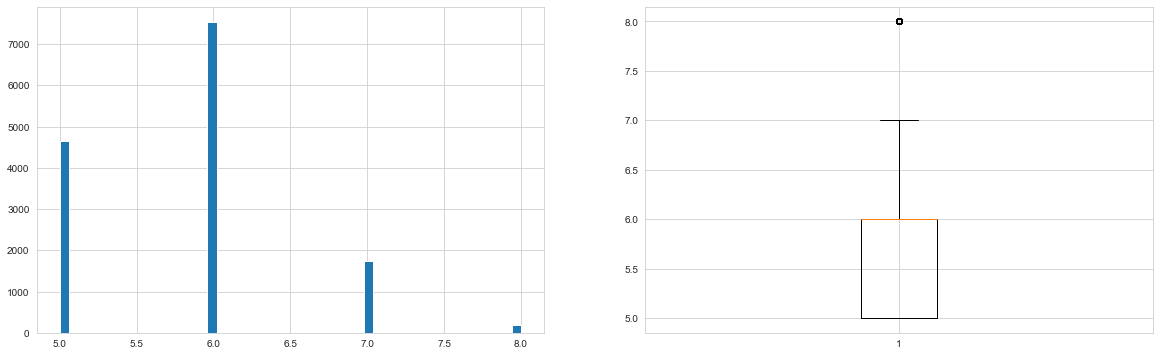

In [58]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Gears, bins=50)

plt.subplot(122)
plt.boxplot(df.Gears, whis=1.5)

plt.show()

# age

In [59]:
info('age')

Column Name    :  age
--------------------------------
Number of Nulls       :  0
Percentage of Nulls   :  % 0.0
Number of Uniques     :  4

--------------------------------
1.000    4269
0.000    3660
3.000    3317
2.000    2898
Name: age, dtype: int64


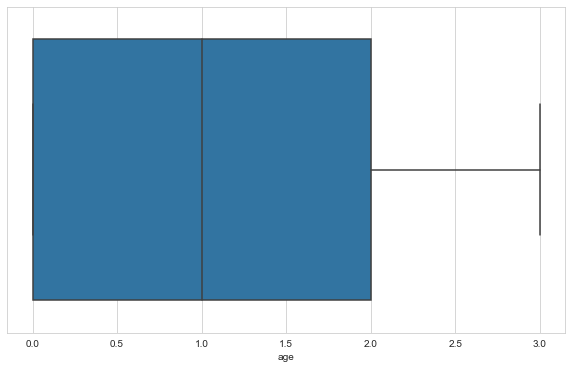

In [60]:
sns.boxplot(data=df, x='age');

There is no outliers in age column.

# hp_kW

In [61]:
info('hp_kW')

Column Name    :  hp_kW
--------------------------------
Number of Nulls       :  0
Percentage of Nulls   :  % 0.0
Number of Uniques     :  81

--------------------------------
85.000     2223
66.000     1925
81.000     1250
100.000    1224
110.000    1003
           ... 
132.000       1
84.000        1
133.000       1
9.000         1
75.000        1
Name: hp_kW, Length: 81, dtype: int64


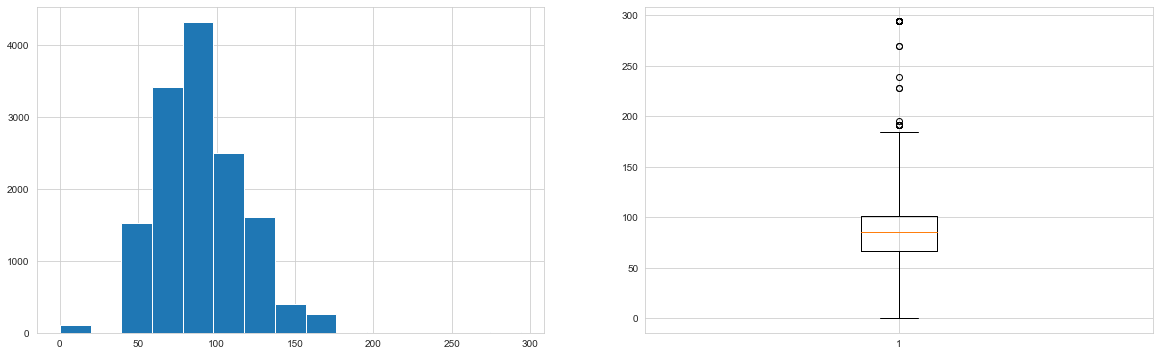

In [62]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.hp_kW, bins=15)

plt.subplot(122)
plt.boxplot(df.hp_kW, whis=2.5)

plt.show()

In [63]:
df.hp_kW.describe()

count   14144.000
mean       88.063
std        27.470
min         0.000
25%        66.000
50%        85.000
75%       101.000
max       294.000
Name: hp_kW, dtype: float64

In [64]:
np.sort(df.hp_kW.unique())

array([  0.,   1.,   4.,   9.,  40.,  44.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  60.,  63.,  65.,  66.,  67.,  70.,  71.,  74.,  75.,
        76.,  77.,  78.,  80.,  81.,  82.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  92.,  93.,  96.,  98., 100., 101., 103., 104., 110.,
       112., 115., 117., 118., 119., 120., 121., 122., 123., 125., 127.,
       132., 133., 135., 137., 140., 141., 143., 146., 147., 149., 150.,
       154., 155., 162., 163., 164., 165., 167., 168., 184., 191., 195.,
       228., 239., 270., 294.])

In [65]:
df.hp_kW.loc[df.hp_kW < 40] = np.nan

In [66]:
df.hp_kW.isnull().sum()

103

In [67]:
fillallmethod(df, "make_model", "body_type", "hp_kW", "mode")

Number of NaN :  0
------------------
85.000     2225
66.000     1935
81.000     1251
100.000    1231
110.000    1008
           ... 
132.000       1
195.000       1
115.000       1
75.000        1
239.000       1
Name: hp_kW, Length: 77, dtype: int64


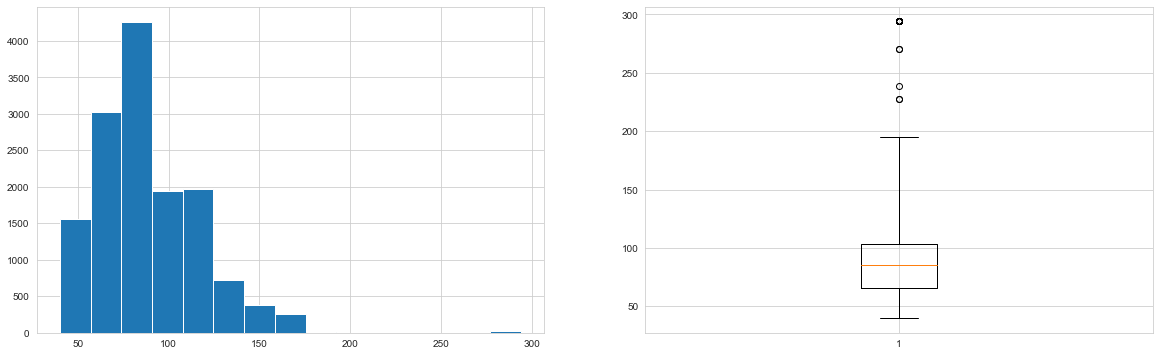

In [68]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.hp_kW, bins=15)

plt.subplot(122)
plt.boxplot(df.hp_kW, whis=2.5)

plt.show()

# Displacement_cc

In [69]:
info('Displacement_cc')

Column Name    :  Displacement_cc
--------------------------------
Number of Nulls       :  0
Percentage of Nulls   :  % 0.0
Number of Uniques     :  77

--------------------------------
1598.000    4537
999.000     2231
1398.000    1246
1399.000     672
1956.000     635
            ... 
122.000        1
1198.000       1
1195.000       1
2967.000       1
1800.000       1
Name: Displacement_cc, Length: 77, dtype: int64


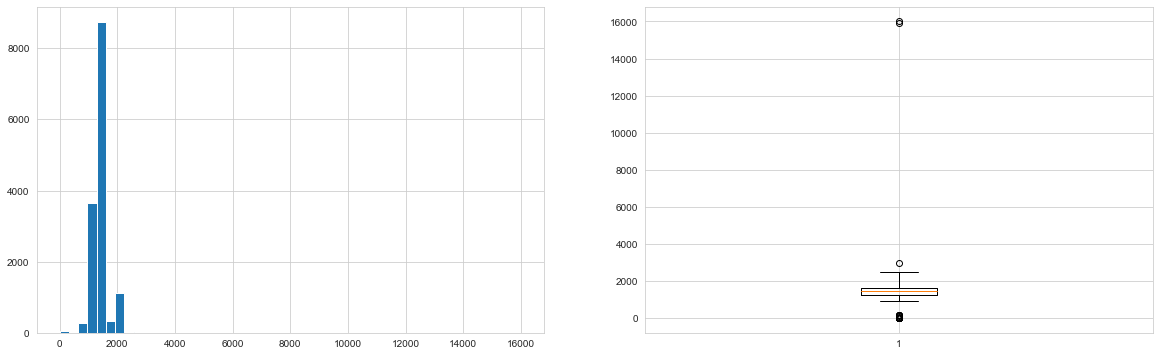

In [70]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Displacement_cc, bins=50)

plt.subplot(122)
plt.boxplot(df.Displacement_cc, whis=2.5)

plt.show()

In [71]:
df.Displacement_cc.describe()

count   14144.000
mean     1429.976
std       336.224
min         1.000
25%      1229.000
50%      1461.000
75%      1598.000
max     16000.000
Name: Displacement_cc, dtype: float64

In [72]:
df.Displacement_cc.sort_values().head(50)

11534     1.000
12800     1.000
12831     1.000
12822     1.000
12830     1.000
12828     1.000
12827     1.000
12826     1.000
12825     1.000
11256     1.000
11262     1.000
11272     1.000
11287     1.000
11289     1.000
11340     1.000
11378     1.000
11432     1.000
11599     1.000
11501     1.000
11598     1.000
11519     1.000
11585     1.000
11520     1.000
11532     1.000
11537     1.000
11574     1.000
11566     1.000
11551     1.000
11549     1.000
11541     1.000
12832     1.000
12833     1.000
11547     1.000
12834     1.000
12464     1.000
12821     1.000
9481      2.000
12728     2.000
12472    54.000
9200    122.000
7025    139.000
7024    139.000
7304    140.000
13836   160.000
12239   890.000
12160   898.000
13134   898.000
12320   898.000
13156   898.000
13136   898.000
Name: Displacement_cc, dtype: float64

In [73]:
df.Displacement_cc.sort_values().tail()

3247    2480.000
3254    2480.000
9685    2967.000
6415   15898.000
9839   16000.000
Name: Displacement_cc, dtype: float64

In [74]:
df.Displacement_cc.replace([1, 2, 54, 122, 139, 140, 160, 16000, 15898], np.nan, inplace=True)

In [75]:
df.Displacement_cc.isnull().sum()

46

In [76]:
fillallmethod(df, "make_model", "body_type", "Displacement_cc", "mode")

Number of NaN :  0
------------------
1598.000    4565
999.000     2231
1398.000    1247
1399.000     674
1956.000     635
            ... 
1369.000       1
1390.000       1
1195.000       1
2967.000       1
1800.000       1
Name: Displacement_cc, Length: 68, dtype: int64


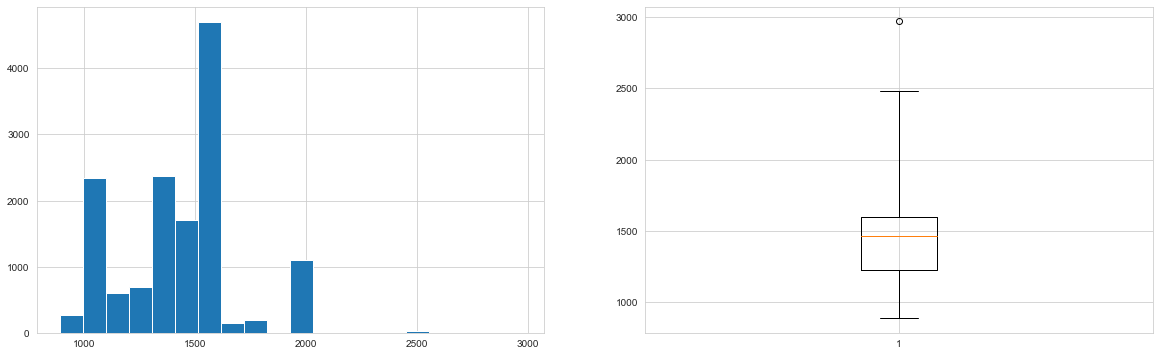

In [77]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Displacement_cc, bins=20)

plt.subplot(122)
plt.boxplot(df.Displacement_cc, whis=2.5)

plt.show()

# Weight_kg

In [78]:
info('Weight_kg')

Column Name    :  Weight_kg
--------------------------------
Number of Nulls       :  0
Percentage of Nulls   :  % 0.0
Number of Uniques     :  434

--------------------------------
1163.000    1398
1360.000    1183
1487.000     910
1135.000     785
1425.000     702
            ... 
1167.000       1
1331.000       1
1132.000       1
1252.000       1
2037.000       1
Name: Weight_kg, Length: 434, dtype: int64


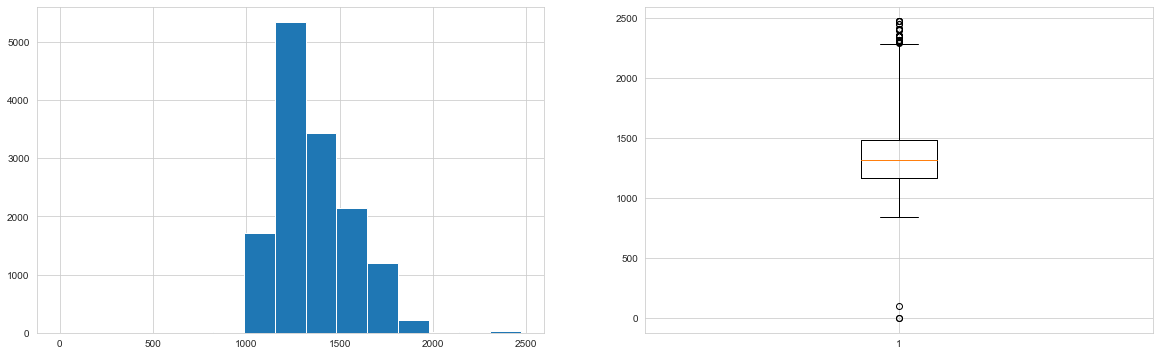

In [79]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Weight_kg, bins=15)

plt.subplot(122)
plt.boxplot(df.Weight_kg, whis=2.5)

plt.show()

In [80]:
df.Weight_kg.describe()

count   14144.000
mean     1343.375
std       201.273
min         1.000
25%      1165.000
50%      1320.000
75%      1487.000
max      2471.000
Name: Weight_kg, dtype: float64

In [81]:
df.Weight_kg.sort_values().head(10)

7514      1.000
11530     1.000
1065    102.000
8000    840.000
12820   900.000
12173   977.000
12136   977.000
12763   980.000
12945   980.000
12696   980.000
Name: Weight_kg, dtype: float64

In [82]:
df["Weight_kg"].replace([1, 102], np.nan, inplace = True)

In [83]:
fillallmethod(df, "make_model", "body_type", "Weight_kg", "mode")

Number of NaN :  0
------------------
1163.000    1399
1360.000    1183
1487.000     911
1135.000     785
1425.000     702
            ... 
1331.000       1
1132.000       1
1252.000       1
1086.000       1
2037.000       1
Name: Weight_kg, Length: 432, dtype: int64


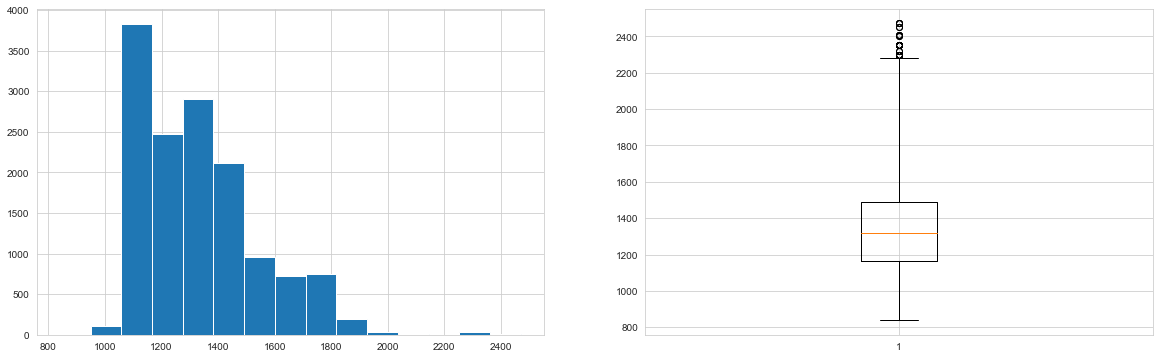

In [84]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Weight_kg, bins=15)

plt.subplot(122)
plt.boxplot(df.Weight_kg, whis=2.5)

plt.show()

# cons_comb

In [85]:
info('cons_comb')

Column Name    :  cons_comb
--------------------------------
Number of Nulls       :  0
Percentage of Nulls   :  % 0.0
Number of Uniques     :  63

--------------------------------
4.000    1264
4.400     865
5.400     763
3.900     707
5.600     622
         ... 
1.100       1
9.100       1
1.200       1
0.500       1
1.000       1
Name: cons_comb, Length: 63, dtype: int64


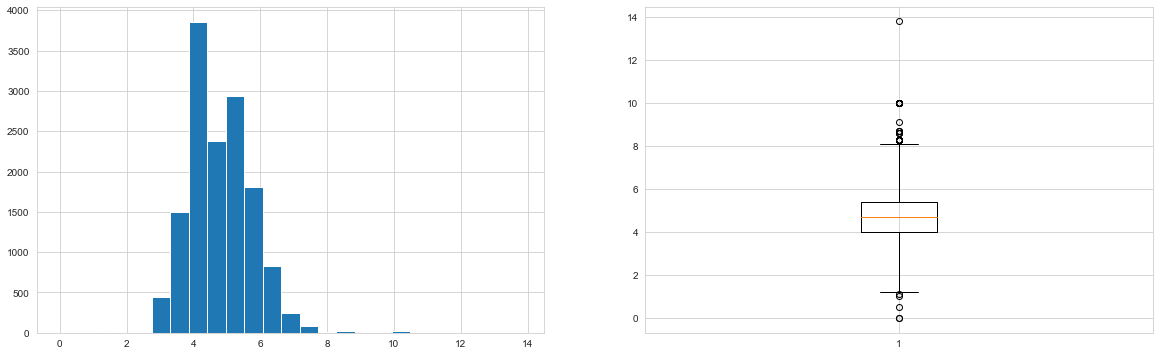

In [86]:
plt.figure(figsize = (20, 6))

plt.subplot(121)
plt.hist(df.cons_comb, bins = 25)

plt.subplot(122)
plt.boxplot(df.cons_comb, whis = 2)

plt.show()

In [87]:
df.cons_comb.describe()

count   14144.000
mean        4.800
std         0.924
min         0.000
25%         4.000
50%         4.700
75%         5.400
max        13.800
Name: cons_comb, dtype: float64

In [88]:
df.cons_comb.sort_values().head(10)

7384    0.000
9487    0.000
13044   0.500
13252   1.000
9436    1.100
12258   1.200
3263    1.600
3261    1.600
3258    1.600
12488   3.000
Name: cons_comb, dtype: float64

In [89]:
df.cons_comb.sort_values().tail(10)

13259   10.000
13257   10.000
13256   10.000
13255   10.000
13254   10.000
13253   10.000
13251   10.000
13258   10.000
13249   10.000
474     13.800
Name: cons_comb, dtype: float64

 The max and min values are normal.

# CO2_Emission

In [90]:
info('CO2_Emission')

Column Name    :  CO2_Emission
--------------------------------
Number of Nulls       :  0
Percentage of Nulls   :  % 0.0
Number of Uniques     :  121

--------------------------------
120.000    955
97.000     750
104.000    669
135.000    531
99.000     476
          ... 
165.000      1
12.324       1
160.000      1
80.000       1
193.000      1
Name: CO2_Emission, Length: 121, dtype: int64


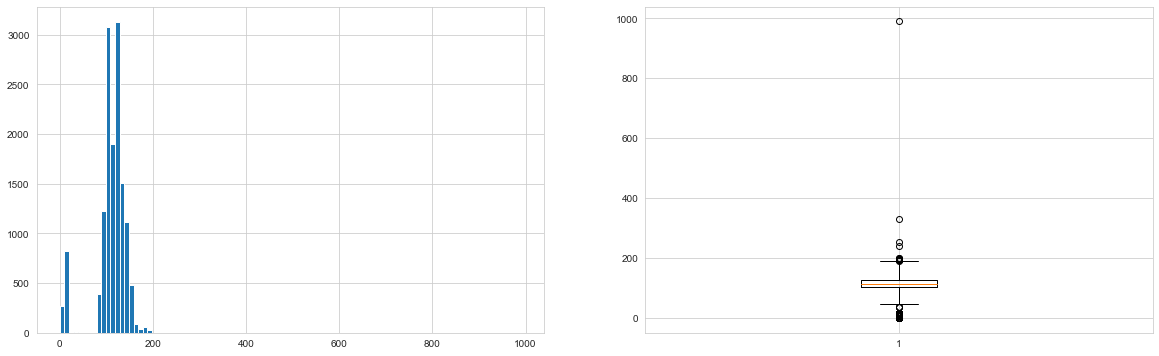

In [91]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.CO2_Emission, bins=100)

plt.subplot(122)
plt.boxplot(df.CO2_Emission, whis=2.5)

plt.show()

In [92]:
df.CO2_Emission.describe()

count   14144.000
mean      110.015
std        34.505
min         0.000
25%       103.000
50%       115.000
75%       128.000
max       990.000
Name: CO2_Emission, dtype: float64

In [93]:
df.CO2_Emission.value_counts().sort_index()

0.000       2
1.000      80
1.060       1
5.000       3
8.000      25
           ..
199.000     2
239.000     1
253.000     1
331.000     1
990.000     1
Name: CO2_Emission, Length: 121, dtype: int64

In [94]:
df.groupby(["make_model", "body_type", "CO2_Emission"]).price.describe()

count      mean      std       min  \
make_model     body_type CO2_Emission                                        
Audi A1        Compact   1.000          1.000 20881.000      NaN 20881.000   
                         9.000          1.000 12479.000      NaN 12479.000   
                         10.000       144.000 16881.375 2834.745  9950.000   
                         11.000        25.000 19960.360 2676.262 14930.000   
                         14.000         2.000 28750.000  268.701 28560.000   
...                                       ...       ...      ...       ...   
Renault Espace Van       175.000        6.000 36931.667 2811.671 33781.000   
                         188.000        1.000 43080.000      NaN 43080.000   
                         191.000        1.000 28465.000      NaN 28465.000   
                         193.000        1.000 38990.000      NaN 38990.000   
                         194.000        1.000 46490.000      NaN 46490.000   

                                            25%       50%       75%       max  
make_model     body_type CO2_Emission                                          
Audi A1        Compact   1.000        20881.000 20881.000 20881.000 20881.000  
                         9.000        12479.000 12479.000 12479.000 12479.000  
                         10.000       15735.000 16445.000 18075.750 29150.000  
                         11.000       17970.000 19990.000 21460.000 28980.000  
                         14.000       28655.000 28750.000 28845.000 28940.000  
...                                         ...       ...       ...       ...  
Renault Espace Van       175.000      35630.000 35830.000 38286.750 41480.000  
                         188.000      43080.000 43080.000 43080.000 43080.000  
                         191.000      28465.000 28465.000 28465.000 28465.000  
                         193.000      38990.000 38990.000 38990.000 38990.000  
                         194.000      46490.000 46490.000 46490.000 46490.000  

[740 rows x 8 columns]

In [95]:
outliers = ((df.CO2_Emission < 36) | (df.CO2_Emission > 330))

df.loc[outliers, "CO2_Emission"] = np.nan

In [96]:
df.CO2_Emission.isnull().sum()

1092

In [97]:
fillallmethod(df, "make_model", "body_type", "CO2_Emission", "median")

Number of NaN :  0
------------------
104.000    1097
120.000    1007
97.000      750
135.000     548
99.000      476
           ... 
121.500       1
80.000        1
160.000       1
108.854       1
193.000       1
Name: CO2_Emission, Length: 103, dtype: int64


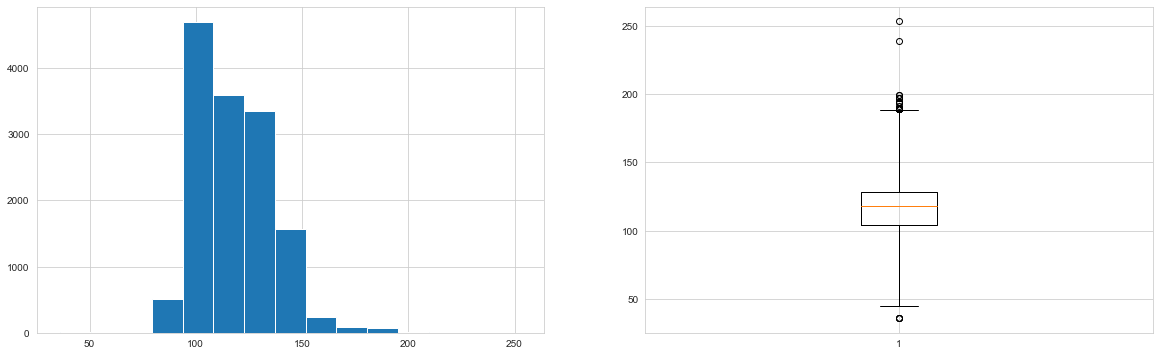

In [98]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.CO2_Emission, bins=15)

plt.subplot(122)
plt.boxplot(df.CO2_Emission, whis=2.5)

plt.show()

In [99]:
df.select_dtypes(exclude='object').columns

Index(['price', 'km', 'Previous_Owners', 'Gears', 'age', 'hp_kW',
       'Displacement_cc', 'Weight_kg', 'cons_comb', 'CO2_Emission'],
      dtype='object')

# make_model

In [100]:
info('make_model')

Column Name    :  make_model
--------------------------------
Number of Nulls       :  0
Percentage of Nulls   :  % 0.0
Number of Uniques     :  9

--------------------------------
Audi A3           2739
Opel Insignia     2396
Audi A1           2368
Opel Astra        2295
Opel Corsa        1979
Renault Clio      1470
Renault Espace     878
Renault Duster      18
Audi A2              1
Name: make_model, dtype: int64


In [101]:
df[df.make_model=="Audi A2"]

,make_model,body_type,price,km,Type,Previous_Owners,Gearing_Type,Drive_Chain,Fuel,comfort_convenience,entertainment_media,Extras,safety_security,Gears,age,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Displacement_cc,Weight_kg,cons_comb,CO2_Emission
2368,Audi A2,Off-Road,28200,26166,Employee's car,1.000,Manual,front,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",6.000,1.000,85.000,No,Metallic,Cloth,1598.000,1135.000,4.900,108.854


In [102]:
#drop_index = df[df.make_model == "Audi A2"].index
#drop_index

In [103]:
#df.drop(drop_index, axis=0, inplace=True)

In [104]:
df.shape

(14144, 23)

# body_type

In [105]:
info('body_type')

Column Name    :  body_type
--------------------------------
Number of Nulls       :  0
Percentage of Nulls   :  % 0.0
Number of Uniques     :  8

--------------------------------
Sedans           7182
Station wagon    3385
Compact          2688
Van               730
Transporter        86
Off-Road           40
Coupe              25
Convertible         8
Name: body_type, dtype: int64


In [106]:
df.body_type.describe()

count      14144
unique         8
top       Sedans
freq        7182
Name: body_type, dtype: object

# Type

In [107]:
info('Type')

Column Name    :  Type
--------------------------------
Number of Nulls       :  0
Percentage of Nulls   :  % 0.0
Number of Uniques     :  5

--------------------------------
Used              10108
New                1345
Pre-registered     1021
Employee's car      903
Demonstration       767
Name: Type, dtype: int64


In [108]:
df.Type.describe()

count     14144
unique        5
top        Used
freq      10108
Name: Type, dtype: object

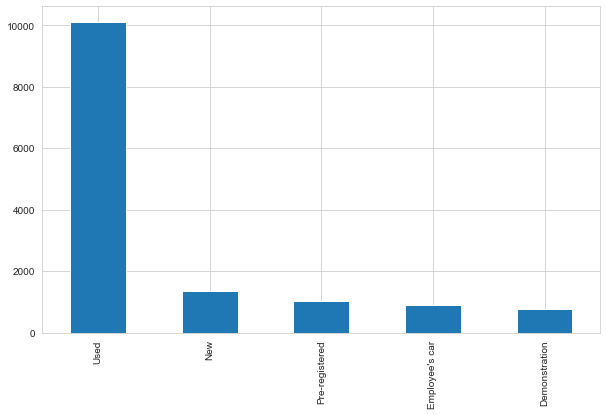

In [109]:
df['Type'].value_counts().plot(kind='bar');

# Gearing_Type

In [110]:
info('Gearing_Type')

Column Name    :  Gearing_Type
--------------------------------
Number of Nulls       :  0
Percentage of Nulls   :  % 0.0
Number of Uniques     :  3

--------------------------------
Manual            7172
Automatic         6511
Semi-automatic     461
Name: Gearing_Type, dtype: int64


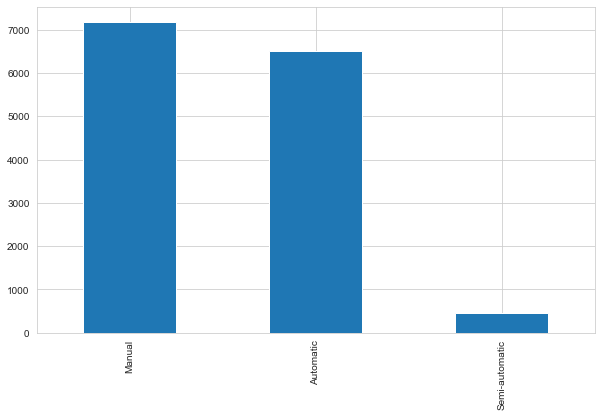

In [111]:
df['Gearing_Type'].value_counts().plot(kind='bar');

# Drive_Chain

In [112]:
info('Drive_Chain')

Column Name    :  Drive_Chain
--------------------------------
Number of Nulls       :  0
Percentage of Nulls   :  % 0.0
Number of Uniques     :  3

--------------------------------
front    13973
4WD        167
rear         4
Name: Drive_Chain, dtype: int64


<AxesSubplot:>

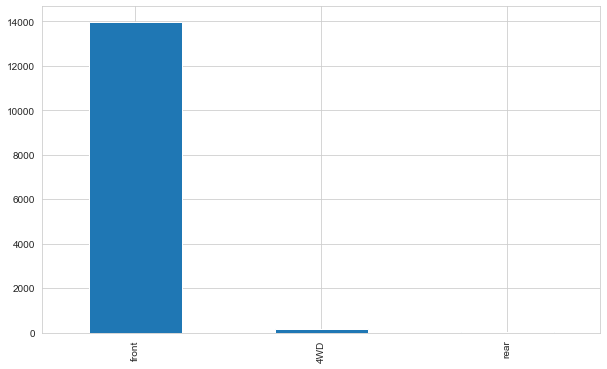

In [113]:
df['Drive_Chain'].value_counts().plot(kind='bar')

In [114]:
#near ???

# Fuel

In [115]:
info('Fuel')

Column Name    :  Fuel
--------------------------------
Number of Nulls       :  0
Percentage of Nulls   :  % 0.0
Number of Uniques     :  4

--------------------------------
Benzine     7514
Diesel      6566
LPG/CNG       59
Electric       5
Name: Fuel, dtype: int64


In [116]:
df[df.Fuel == "Electric"][["make_model", "body_type", "CO2_Emission", "Gears", "hp_kW", "cons_comb", "price"]]

,make_model,body_type,CO2_Emission,Gears,hp_kW,cons_comb,price
3008,Audi A3,Compact,36.000,6.000,150.000,4.800,24950
3258,Audi A3,Sedans,36.000,6.000,110.000,1.600,38450
3261,Audi A3,Sedans,36.000,6.000,110.000,1.600,35899
3263,Audi A3,Sedans,36.000,6.000,110.000,1.600,38000
12051,Renault Clio,Sedans,118.000,5.000,55.000,3.300,8490


In [117]:
drop_index = df[df.Fuel == "Electric"].index
drop_index

Int64Index([3008, 3258, 3261, 3263, 12051], dtype='int64')

In [118]:
df.drop(drop_index, axis=0, inplace=True)

In [119]:
df.reset_index(drop=True, inplace=True)

In [120]:
df.shape

(14139, 23)

# comfort_convenience

In [121]:
info('comfort_convenience')

Column Name    :  comfort_convenience
--------------------------------
Number of Nulls       :  0
Percentage of Nulls   :  % 0.0
Number of Uniques     :  6193

--------------------------------
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                                   307
Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Leather steering wheel,Light sensor,Lumbar support,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heati

# entertainment_media

In [122]:
info('entertainment_media')

Column Name    :  entertainment_media
--------------------------------
Number of Nulls       :  0
Percentage of Nulls   :  % 0.0
Number of Uniques     :  346

--------------------------------
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                  1541
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB              1061
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB     789
On-board computer                                                            523
Radio                                                                        493
                                                                            ... 
Bluetooth,CD player,Digital radio,Hands-free equipment,Radio                   1
CD player,Hands-free equipment,MP3,Radio,USB                                   1
MP3,Radio,Sound system,USB                                                     1
Bluetooth,MP3,On-board computer,Sound system,USB                               

# Extras

In [123]:
info('Extras')

Column Name    :  Extras
--------------------------------
Number of Nulls       :  0
Percentage of Nulls   :  % 0.0
Number of Uniques     :  659

--------------------------------
Alloy wheels                                                                                               4950
Alloy wheels,Touch screen                                                                                   608
Alloy wheels,Voice Control                                                                                  529
Alloy wheels,Touch screen,Voice Control                                                                     514
Roof rack                                                                                                   502
                                                                                                           ... 
Alloy wheels,Handicapped enabled,Shift paddles,Voice Control                                                  1
Alloy wheels,Handicapped enabled,Shif

# safety_security

In [124]:
info('safety_security')

Column Name    :  safety_security
--------------------------------
Number of Nulls       :  0
Percentage of Nulls   :  % 0.0
Number of Uniques     :  4439

--------------------------------
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                      628
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                                 438
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fo

# Inspection_new

In [125]:
info('Inspection_new')

Column Name    :  Inspection_new
--------------------------------
Number of Nulls       :  0
Percentage of Nulls   :  % 0.0
Number of Uniques     :  2

--------------------------------
No     10502
Yes     3637
Name: Inspection_new, dtype: int64


# Paint_Type

In [126]:
info('Paint_Type')

Column Name    :  Paint_Type
--------------------------------
Number of Nulls       :  0
Percentage of Nulls   :  % 0.0
Number of Uniques     :  3

--------------------------------
Metallic       13788
Uni/basic        345
Perl effect        6
Name: Paint_Type, dtype: int64


# Upholstery_type

In [127]:
info('Upholstery_type')

Column Name    :  Upholstery_type
--------------------------------
Number of Nulls       :  0
Percentage of Nulls   :  % 0.0
Number of Uniques     :  5

--------------------------------
Cloth           11387
Part leather     1351
Full leather     1288
Velour             57
alcantara          56
Name: Upholstery_type, dtype: int64


<AxesSubplot:>

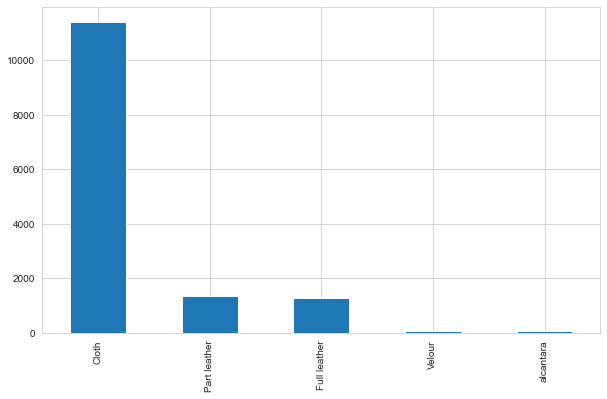

In [128]:
df['Upholstery_type'].value_counts().plot(kind='bar')


# Final Step (Checking final situation of data via graphs)

In [129]:
df.head(3).T

,0,1,2
make_model,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
km,56013,80000,83450
Type,Used,Used,Used
Previous_Owners,2.000,1.000,1.000
Gearing_Type,Automatic,Automatic,Automatic
Drive_Chain,front,front,front
Fuel,Diesel,Benzine,Diesel
comfort_convenience,"Air conditioning,Armrest,Automatic climate con...","Air conditioning,Automatic climate control,Hil...","Air conditioning,Cruise control,Electrical sid..."


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14139 entries, 0 to 14138
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           14139 non-null  object 
 1   body_type            14139 non-null  object 
 2   price                14139 non-null  int64  
 3   km                   14139 non-null  int64  
 4   Type                 14139 non-null  object 
 5   Previous_Owners      14139 non-null  float64
 6   Gearing_Type         14139 non-null  object 
 7   Drive_Chain          14139 non-null  object 
 8   Fuel                 14139 non-null  object 
 9   comfort_convenience  14139 non-null  object 
 10  entertainment_media  14139 non-null  object 
 11  Extras               14139 non-null  object 
 12  safety_security      14139 non-null  object 
 13  Gears                14139 non-null  float64
 14  age                  14139 non-null  float64
 15  hp_kW                14139 non-null 

In [131]:
df_numeric=df.select_dtypes("number")
df_numeric

,price,km,Previous_Owners,Gears,age,hp_kW,Displacement_cc,Weight_kg,cons_comb,CO2_Emission
0,15770,56013,2.000,5.000,3.000,66.000,1422.000,1220.000,3.800,99.000
1,14500,80000,1.000,7.000,2.000,141.000,1798.000,1255.000,5.600,129.000
2,14640,83450,1.000,5.000,3.000,85.000,1598.000,1135.000,3.800,99.000
3,14500,73000,1.000,6.000,3.000,66.000,1422.000,1195.000,3.800,99.000
4,16790,16200,1.000,5.000,3.000,66.000,1422.000,1135.000,4.100,109.000
...,...,...,...,...,...,...,...,...,...,...
14134,39980,100,1.000,6.000,0.000,118.000,1598.000,1734.000,4.700,123.000
14135,39950,0,1.000,6.000,0.000,147.000,1997.000,1758.000,5.300,139.000
14136,39950,1000,1.000,6.000,0.000,165.000,1798.000,1734.000,6.800,153.000
14137,39885,9900,1.000,7.000,0.000,165.000,1798.000,1708.000,7.400,168.000


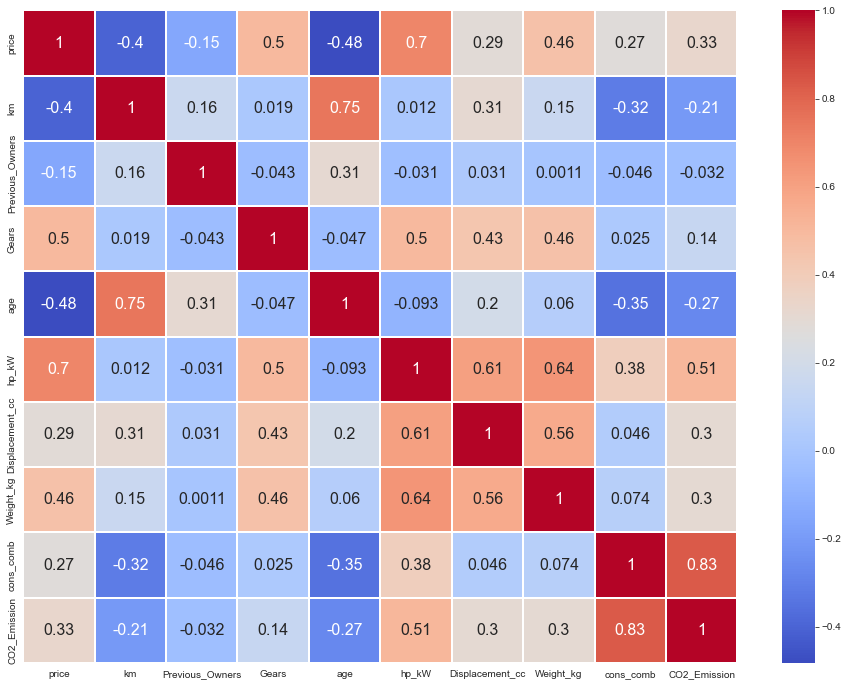

In [132]:
plt.figure(figsize=(16, 12))

sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", linewidths=0.2, annot_kws={"size": 16});

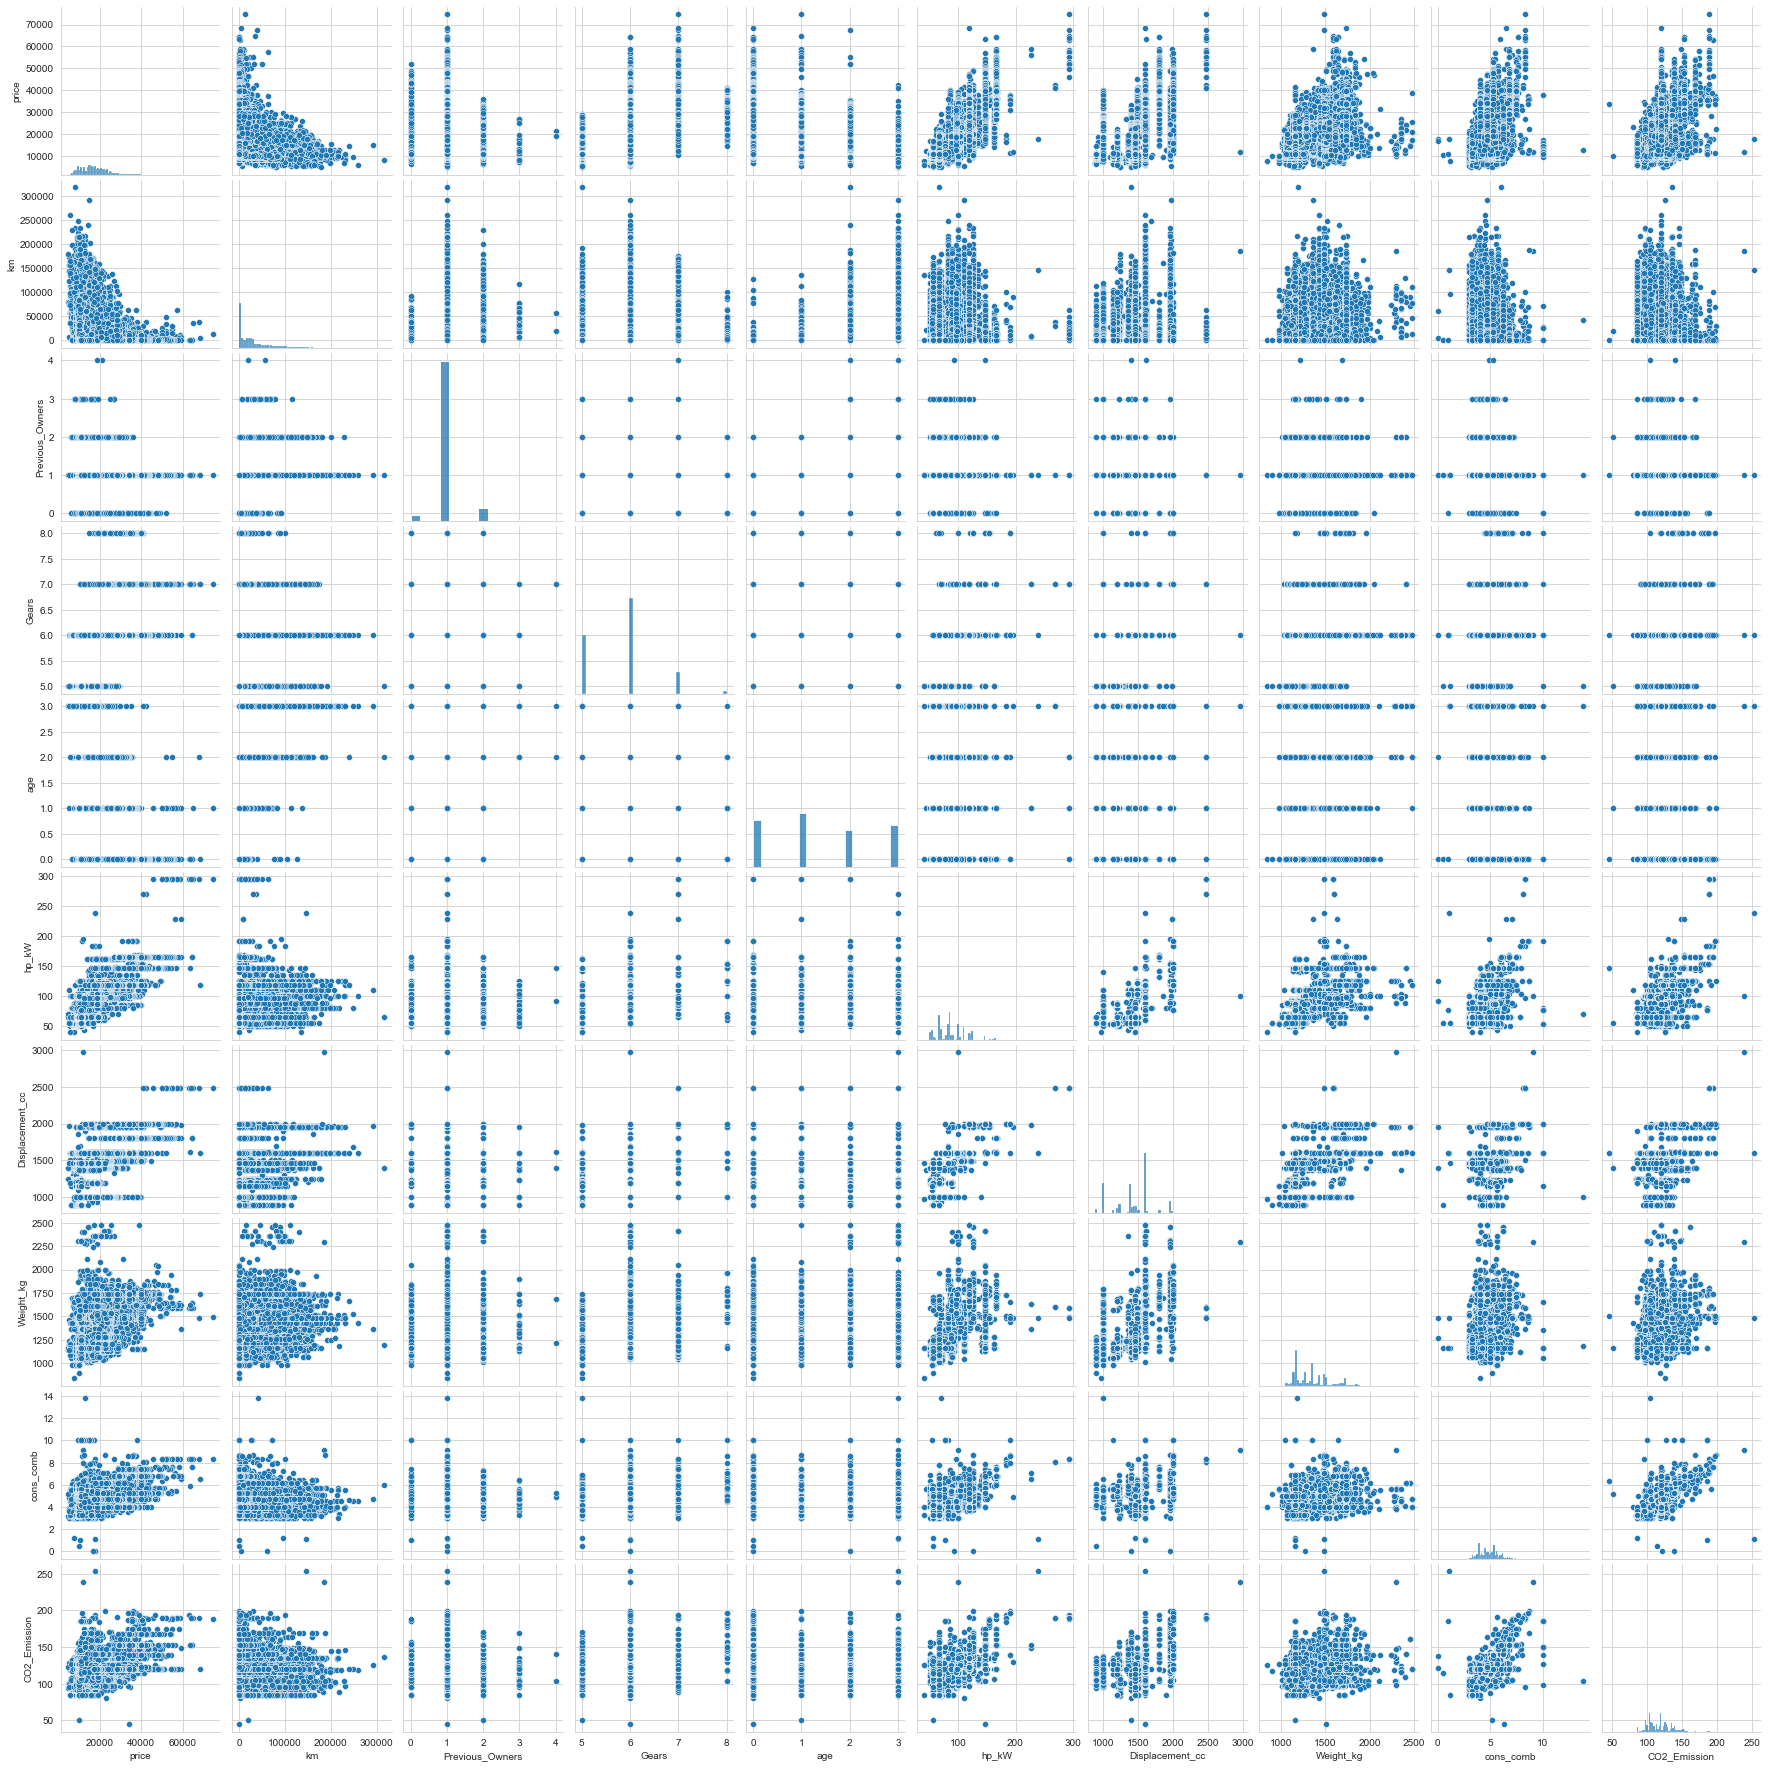

In [133]:
sns.pairplot(df_numeric, size = 2.5)
plt.show()

# Exporting dataframe to csv file (without dummy)

In [134]:
df.to_csv('auto_scout_not_dummy.csv', index=False)

# Dummy Operation

In [135]:
df = df.join(df["comfort_convenience"].str.get_dummies(sep = ",").add_prefix("cc_"), lsuffix='_', rsuffix='_')
df = df.join(df["entertainment_media"].str.get_dummies(sep = ",").add_prefix("em_"), lsuffix='_', rsuffix='_')
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"), lsuffix='_', rsuffix='_')
df = df.join(df["safety_security"].str.get_dummies(sep = ",").add_prefix("ss_"), lsuffix='_', rsuffix='_')

In [136]:
df.drop(["comfort_convenience","entertainment_media","Extras","safety_security"], axis=1, inplace=True)

In [137]:
df.shape

(14139, 113)

In [138]:
df_final = pd.get_dummies(df, drop_first=True)

In [139]:
df_final.shape

(14139, 136)

In [140]:
df_final.head()

,price,km,Previous_Owners,Gears,age,hp_kW,Displacement_cc,Weight_kg,cons_comb,CO2_Emission,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_Chain_front,Drive_Chain_rear,Fuel_Diesel,Fuel_LPG/CNG,Inspection_new_Yes,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Full leather,Upholstery_type_Part leather,Upholstery_type_Velour,Upholstery_type_alcantara
0,15770,56013,2.000,5.000,3.000,66.000,1422.000,1220.000,3.800,99.000,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0
1,14500,80000,1.000,7.000,2.000,141.000,1798.000,1255.000,5.600,129.000,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,14640,83450,1.000,5.000,3.000,85.000,1598.000,1135.000,3.800,99.000,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0
3,14500,73000,1.000,6.000,3.000,66.000,1422.000,1195.000,3.800,99.000,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0
4,16790,16200,1.000,5.000,3.000,66.

In [141]:
df_final.head().T

,0,1,2,3,4
price,15770.000,14500.000,14640.000,14500.000,16790.000
km,56013.000,80000.000,83450.000,73000.000,16200.000
Previous_Owners,2.000,1.000,1.000,1.000,1.000
Gears,5.000,7.000,5.000,6.000,5.000
age,3.000,2.000,3.000,3.000,3.000
...,...,...,...,...,...
Paint_Type_Uni/basic,0.000,0.000,0.000,0.000,0.000
Upholstery_type_Full leather,0.000,0.000,0.000,0.000,0.000
Upholstery_type_Part leather,0.000,0.000,0.000,0.000,0.000
Upholstery_type_Velour,0.000,0.000,0.000,0.000,0.000


In [142]:
df_final.to_csv('auto_scout_dummy.csv', index=False)

--END--

In [144]:
!pip install jupyterthemes